In [71]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


In [72]:
raw_data = pd.read_csv('../SVM/wine_data.csv')
raw_data

FileNotFoundError: [Errno 2] No such file or directory: '../SVM/wine_data.csv'

In [ ]:
raw_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,9.797079,0.774796,0.793870,31.289348,0.200245,129.442333,229.008762,1.009972,3.158712,1.020641,11.291716,6.000000
std,2.413919,0.365015,0.384833,19.015391,0.124933,77.167262,100.183265,0.012032,0.171371,0.408304,1.182198,2.000048
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.600000,0.430000,0.410000,9.800000,0.072000,45.000000,150.000000,0.997417,3.030000,0.620000,10.400000,4.000000
50%,10.000000,0.830000,0.870000,37.600000,0.205000,145.800000,240.500000,1.012200,3.150000,1.080000,11.300000,6.000000
75%,11.800000,1.080000,1.110000,46.800000,0.298000,194.325000,311.625000,1.019840,3.270000,1.360000,12.200000,8.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
raw_data['pH'].value_counts()

pH
3.16    574
3.08    499
3.06    490
3.14    484
3.19    478
       ... 
2.75      1
3.85      1
3.79      1
2.72      1
3.82      1
Name: count, Length: 112, dtype: int64

In [ ]:
raw_data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
20995,9.7,1.020,0.91,50.00,0.412,114.6,181.7,1.02085,3.30,0.89,12.0,9
20996,10.2,0.610,0.88,53.80,0.250,62.4,204.7,1.02776,3.52,1.14,9.7,9
20997,13.4,0.460,1.04,52.10,0.449,63.0,273.5,1.02618,2.89,1.76,9.3,9
20998,6.6,1.030,1.09,25.30,0.138,179.8,295.0,1.02476,2.94,1.54,12.9,9


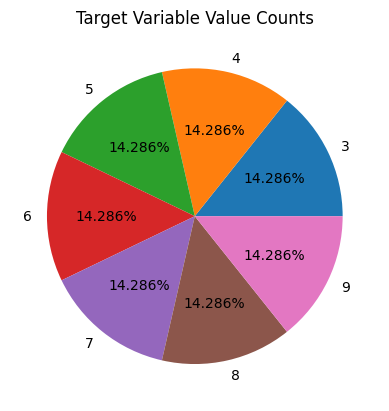

In [ ]:
# get the set of distinct classes
labels = raw_data.quality.unique()

# get the count of each class
sizes = raw_data.quality.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

<Axes: >

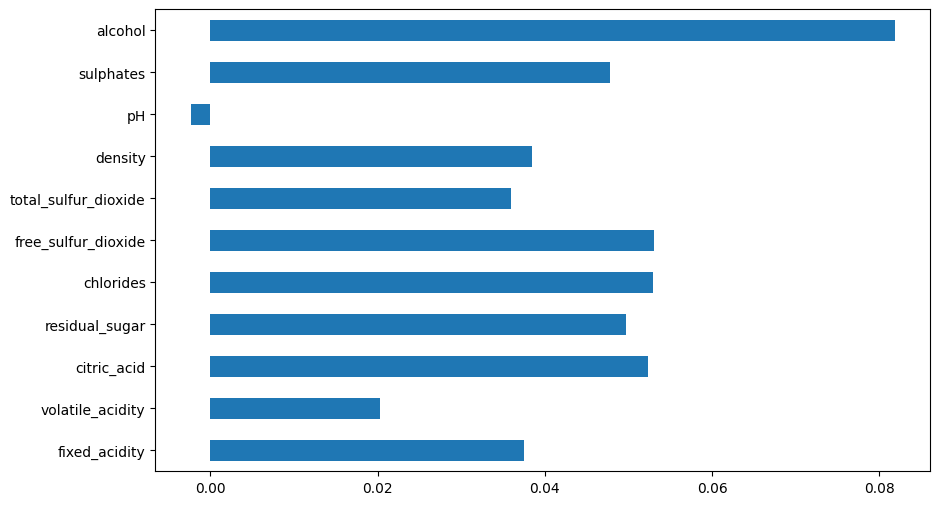

In [ ]:
correlation_values = raw_data.corr()['quality'].drop('quality')
correlation_values.plot(kind='barh', figsize=(10, 6))

In [ ]:
data = raw_data.drop('quality',axis=1)
X = StandardScaler().fit_transform(data)
encode = LabelEncoder().fit_transform(raw_data.quality)
y = encode

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=32,test_size=0.2)

In [ ]:
w_train = compute_sample_weight('balanced',y_train)

In [ ]:
dt = RandomForestClassifier(n_estimators=950,random_state=42)
dt.fit(X_train,y_train,sample_weight=w_train)

,n_estimators,950
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
svm = LinearSVC(class_weight='balanced',random_state=32,loss='squared_hinge',fit_intercept=False)
svm.fit(X_train,y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,False
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,42


In [ ]:
y_pred_dt = dt.predict_proba(X_test)

In [ ]:
y_pred_dt = dt.predict_proba(X_test)

In [ ]:
roc_auc_dt = roc_auc_score(y_test, y_pred_dt,multi_class='ovo')
print('Decision Tree ROC-AUC score : {0:.3f}'.format(roc_auc_dt))

Decision Tree ROC-AUC score : 0.910


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

# encode label jadi 0..n_classes-1
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# aktifkan probability=True
svm = SVC(probability=True)
svm.fit(X_train, y_train_enc)

# ambil probabilitas
y_pred_proba = svm.predict_proba(X_test)

# hitung ROC AUC multiclass
roc_auc_svm = roc_auc_score(y_test_enc, y_pred_proba, multi_class='ovo')
print("SVM ROC-AUC score: {:.3f}".format(roc_auc_svm))


SVM ROC-AUC score: 0.738
